**1장 – 한 눈에 보는 머신러닝**

_이 노트북은 1장의 그림을 만들기 위한 것입니다._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 예제 1-1

파이썬 2.x도 사용할 수 있지만 향후 이 버전은 더이상 지원되지 않습니다. 대신 파이썬 3을 사용세요.

_번역서의 깃허브는 파이썬 3.7, 사이킷런 0.22.2에서 테스트했습니다._

In [2]:
# Python ≥3.5 이상이 권장됩니다
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 이상이 권장됩니다
import sklearn
assert sklearn.__version__ >= "0.20"

이 함수는 OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합칩니다. 이는 번거로운 작업이고 머신러닝과는 관계가 없기 때문에 책 안에 포함시키지 않았습니다.

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

책에 있는 코드는 데이터 파일이 현재 디렉토리에 있다고 가정합니다. 여기에서는 datasets/lifesat 안에서 파일을 읽어 들입니다.

In [5]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [6]:
# 주피터에 그래프를 깔끔하게 그리기 위해서
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# 데이터 다운로드
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    if not os.path.exists(datapath+filename) :
        print("Downloading", filename)
        url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
        urllib.request.urlretrieve(url, datapath + filename)
    else :
        print('{} exists'.format(datapath+filename))

[    0.    6666.67 13333.33 20000.   26666.67 33333.33 40000.   46666.67
 53333.33 60000.  ] <class 'numpy.ndarray'> (10,) 1
[[    0.  ]
 [ 6666.67]
 [13333.33]
 [20000.  ]
 [26666.67]
 [33333.33]
 [40000.  ]
 [46666.67]
 [53333.33]
 [60000.  ]] <class 'numpy.ndarray'> (10, 1) 2
[[4.85]
 [5.18]
 [5.51]
 [5.84]
 [6.16]
 [6.49]
 [6.82]
 [7.15]
 [7.47]
 [7.8 ]] <class 'numpy.ndarray'> (10, 1) 2


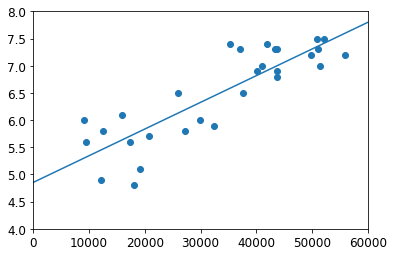

In [8]:
# 예제 코드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

np.set_printoptions(2) # 소숫점이하 3자리까미만 인쇄

# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 데이터 시각화
plt.scatter(X, y)
plt.axis([0, 60000, 4, 8])

# 회귀함수 그리기
X1 = np.linspace(0, 60000, 10)
print(X1, type(X1), X1.shape, X1.ndim)  # 1D array
X2 = X1.reshape((-1, 1))     # 2D array
print(X2, type(X2), X2.shape, X2.ndim)
y_pred = model.predict(X2)
print(y_pred, type(y_pred), y_pred.shape, y_pred.ndim)
plt.plot(X2, y_pred)

plt.show()

In [33]:
# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

X_new_arr = np.array(X_new)
print('X_new :', type(X_new), '\n', X_new)
print('X_new_arr :', type(X_new_arr), '\n', X_new_arr)


[[5.77]]
X_new : <class 'list'> 
 [[22587]]
X_new_arr : <class 'numpy.ndarray'> 
 [[22587]]


## Assignment
```
1) 다음 각각의 type을 적어라.  array인 경우는 차원(dimension)도 적기 바람.
  a) a = [1000]
  ==> list
      
  b) b = [[1000]]
  ==> list
      
  c) c = np.array(a)
  ==> array, 1차원
  
  d) d = np.array(b)
  ==> array, 2차원

2) 다음 코드 수행 결과는?  에러가 나오면 왜 그런지, 어떻게 고쳐야하는지 적어라
X_new = [22587]  # 키프로스 1인당 GDP
print(model.predict(X_new)) 

==> 에러 발생
    수정 방법 : X_new = [[22587]]로 코드를 수정해야합니다
    수정 이유 : 1차원이 아닌, 다차원 배열로 코드를 작성해야한다

3) 위 프로그램에서 다음 명령어의 역활은 무엇인가?
X2 = X1.reshape((-1, 1))     # 2D array

==> X1 배열의 차원(Dimension)을 재구조화, 변경하고자 reshape() 메소드를 사용합니다.
    .reshape을 통해 재구조화된 배열을 X2안에 넣습니다

4) k-최근접 이웃 회귀 모델(아래 참조)로 바꿔 회귀선을 그려랴
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

print(X.shape, y.shape)
model.fit(X, y)

==> 다음 코드에 작성

*** 풀이 결과는 pdf파일로 바꿔 smartLEAD에 제출하기 바람.
참고 : browser에서 인쇄(오른쪽위 ... 표시) / pdf로 인쇄
https://mljar.com/blog/jupyter-notebook-pdf/
```

(29, 1) (29, 1)
[    0.    6666.67 13333.33 20000.   26666.67 33333.33 40000.   46666.67
 53333.33 60000.  ] <class 'numpy.ndarray'> (10,) 1
[[    0.  ]
 [ 6666.67]
 [13333.33]
 [20000.  ]
 [26666.67]
 [33333.33]
 [40000.  ]
 [46666.67]
 [53333.33]
 [60000.  ]] <class 'numpy.ndarray'> (10, 1) 2
[[5.5 ]
 [5.5 ]
 [5.6 ]
 [5.2 ]
 [6.1 ]
 [6.43]
 [7.1 ]
 [7.  ]
 [7.27]
 [7.23]] <class 'numpy.ndarray'> (10, 1) 2


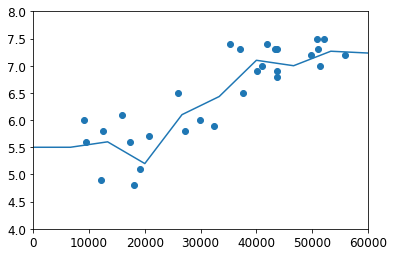

In [48]:
##문제 4

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

np.set_printoptions(2) # 소숫점이하 3자리까미만 인쇄

# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 선형 모델 선택
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
print(X.shape, y.shape)
model.fit(X, y)

# 데이터 시각화
plt.scatter(X, y)
plt.axis([0, 60000, 4, 8])

# 회귀함수 그리기
X1 = np.linspace(0, 60000, 10)
print(X1, type(X1), X1.shape, X1.ndim)  # 1D array
X2 = X1.reshape((-1, 1))     # 2D array
print(X2, type(X2), X2.shape, X2.ndim)
y_pred = model.predict(X2)
print(y_pred, type(y_pred), y_pred.shape, y_pred.ndim)
plt.plot(X2, y_pred)

plt.show()